### Test code for shifting images


In [1]:
import matplotlib.pyplot as plt                      # import matplotlib
import numpy as np 


def rgb2gray(a, method = "wgt"):
    """
    Convert RGB array to grayscale
    Input:
        a - 3d array[ny,nx,3] representing RGB image
        method - 'wgt' [default] - weighted or luminosity method
               - 'avg' - average method
    Returns:
        gy - 2d array representing grayscale image
    """
    ny, nx = a.shape[0],a.shape[1]
    gy = np.zeros((ny ,nx))
    if method == "avg":
        rw, gw, bw = 1./3., 1./3., 1./3.
    elif method == "wgt":
        rw, gw, bw = 0.299,0.587,0.114
    else: 
        rw, gw, bw = 1./3., 1./3., 1./3.
        print ("bad value for method, using default")
    gy = a[:,:,0]*rw+a[:,:,1]*gw+a[:,:,2]*bw
    return gy

def jpg2a(fname):
    """
    Read in image as grayscale
    """
    im = plt.imread(fname)
    img = rgb2gray(im)
    return img

im1 = jpg2a('small1.jpg')  # load image into np array
im2 = jpg2a('small1_shifted.jpg')  # load image into np array 
print(np.shape(im1))

(600, 1000)


#### Three Stooges method - adjust image visually; iterate until they agree

186.53800000000172


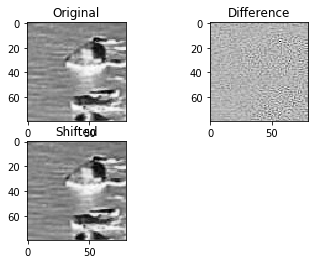

In [2]:
# pick some offsets to try
iy = -15
ix = -33
# plot section of image with some useful texture
plt.subplot(221)
plt.imshow(im1[300:380,600:680],cmap='Greys')
plt.title('Original')
plt.subplot(223)
plt.imshow(im2[300+iy:380+iy,600+ix:680+ix],cmap='Greys')
plt.title('Shifted')
plt.subplot(222)
plt.title('Difference')
plt.imshow(im1[300:380,600:680]-im2[300+iy:380+iy,600+ix:680+ix],cmap='Greys')
print(np.sum(im1[300:380,600:680]-im2[300+iy:380+iy,600+ix:680+ix]))

#### One-liner in scikit-image

In [3]:
from skimage.feature import register_translation
# pixel precision first
shift, error, diffphase = register_translation(im1, im2)
print(shift, error, diffphase)

[15. 33.] 0.10448808283446637 -8.847434927636558e-19


C:\Users\csherwood\AppData\Local\Continuum\miniconda3\envs\CRS\lib\site-packages\skimage\feature\__init__.py:45: skimage_deprecation: Function ``register_translation`` is deprecated and will be removed in version 0.19. Use ``skimage.registration.phase_cross_correlation`` instead.
  removed_version='0.19')


Text(0.5, 1.0, 'Cross-correlation')

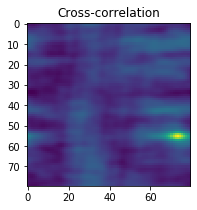

In [4]:
# Show the output of a cross-correlation to show what the algorithm is
# doing behind the scenes
image_product = np.fft.fft2(im1[300:380,600:680]) * np.fft.fft2(im2[300:380,600:680]).conj()
cc_image = np.fft.fftshift(np.fft.ifft2(image_product))
fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(111)
ax1.imshow(cc_image.real)
ax1.set_title("Cross-correlation")


#### Crappy example kind of showing how this works
(Also, poor coding example)

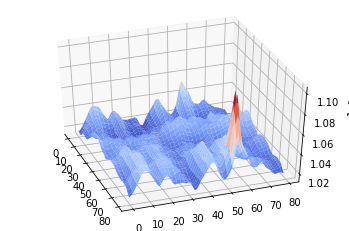

In [6]:
ny,nx = cc_image.shape
X,Y = np.meshgrid(range(0,ny),range(0,nx))
# X = range(0,nx)
# Y = range(0,ny)
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X,Y,cc_image.real, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
ax.view_init(elev=40., azim=-20)